






         Привет уважаемая команда! Сопроводительная заметка пояснение:


         
      Здесь я ввел свои дополнительные элементы в дизайн,  что бы показать, найденую и усвоеную мной 
    посследовательно проверок и рассуждений в ЭТОМ виде вопроса. Если у вас другое опытное мнение, пожалуйста, 
    дайте обратную связь, она будет очень ценной для меня!

    Как и ранее, для вас ( и по своей привычке ),я все подробно описываю, читайте неторопливо, я старался.
        Моя цель ,по прежнему, донести способ рассуждения, а не короткий вывод.  Если есть ошибки в расчетах 
        или оценках показатели, прошу учитывать новизну материала, не ругать, и просто дать разъяснения.

    Исторически сложилось , что в первую очередь, меня заботила наука принятия решения в условиях извечной 
    асимметрии информации и собственной «возможности ошибиться». Поэтому стараюст понимть и контролировать то, 
    КАКИЕ ошибки и КОГДА я допускаю. Мне хочется верить, это важнейший навык для исследователя.	
    Помогают мне в  этом, мои товарищи Канеман, Тверски, Талеб, еще с 10х годов. 
    Сейчас более плотно знакомлюсь со статистикой и визуализацией. 

   


                                                            ИМПОРТ
                                                            

In [4]:
import pandas as pd
import numpy as np
import pandahouse
import matplotlib.pyplot as plt
import scipy.stats as stats

connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20221220'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') AS likes,
    sum(action = 'view') AS views,
    likes/views AS ctr
FROM {db}.feed_actions 
WHERE toDate(time) >= '2022-12-02' AND toDate(time) <= '2022-12-08'
    AND exp_group IN (2,1)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

#сомтрим количество наблюдений в группах
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
1,10079,10079,10079,10079
2,9952,9952,9952,9952


In [5]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


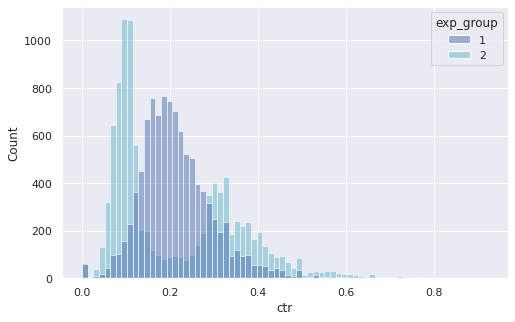

In [6]:
# смотрим частоту! выпадания величин ctr  2 b 1  группы. Смотрим исх рапсределение.


import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['b', 'c'],
              alpha=0.5,
              kde=False)

                                                    ПОВЕРКА ДОПУЩЕНИЯ ДЛЯ t test
                                                    

In [7]:
stats.levene(df.query('exp_group ==2').ctr, df.query('exp_group ==1').ctr)

LeveneResult(statistic=2423.111217314752, pvalue=0.0)

среднее занчение 2йгруппы p value is 1.7222564581078245e-17
среднее занчение 1йгруппы p value is 6.07957060818495e-08
 95 процентиль полученных занчений p value is 2.6330886960580492e-17
 95 процентиль полученных занчений p value is 4.392127195274042e-08


'    ПОЖАЛУЙСТА, НАСТАВНИКИ, ПОДСОБИТЕ,СКИНЬТЕ МНЕ МАТЕРИАЛ, С ХОРОШИМ РАЗБОРОМ ,ОГРАНИЧЕНИЯМИ И ДОПУЩЕНИЕМ\n      ПУАССОНОВСКОГО БУСТРАПА!! БУДУ благодарен! '

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

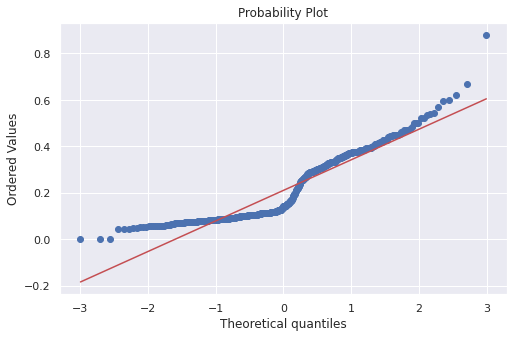

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

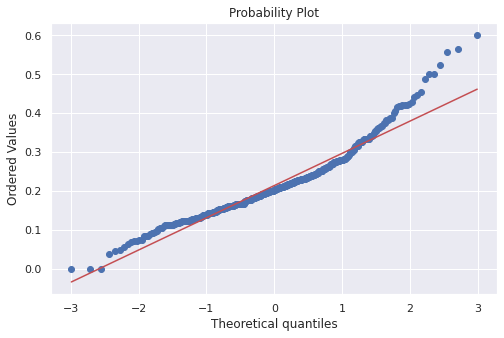

In [8]:

# 2) ctr сама шкала отношений, значит можно и параметрику 
#                                                 (НО ЕСЛИ будет подходящее рапсределение и статистика под него!)




# 3)   проверка нормальность распределений исх данных, через sample. (хотя у нас выше визуальное представдление)

trash_2 = []
for i in range(100):
    p2 = stats.shapiro(df.query('exp_group ==2').ctr.sample(500, replace =False))[1]
    trash_2.append(p2)

trash_1 = []
for i in range(100):
    p1 = stats.shapiro(df.query('exp_group ==1').ctr.sample(500, replace =False))[1]
    trash_1.append(p1)
    
print(f'среднее занчение 2йгруппы p value is {np.mean(trash_2)}')
print(f'среднее занчение 1йгруппы p value is {np.mean(trash_1)}')


print(f' 95 процентиль полученных занчений p value is {np.quantile(trash_2, 0.95)}')
print(f' 95 процентиль полученных занчений p value is {np.quantile(trash_1, 0.95)}')


#    ИТОГО
# срденее значние и 95 процентиль, обеих групп  - все p МЕНЬШЕ принятой Альфы , 
# при sample size 500( а мы знаем,  что тут есть зависимость, особенно если выборки НЕ СОВСЕММ РЕПРЕЗЕНТИАТИВНЫ к ГС)

#  А ВНАШЕМ СЛУЧАЕ - случайная величина "X" из 500 наблюдений СЛЙЧАЙНО взятых из 
#         указанных выборок распределена   НЕ нормально.
#  Но  по практическому наблюдению Толи, все равно можно исопльзовать т тест из за ЦПТ.
#  Выборка у нас большая и норм рапсрееление выборочных средних(эксп группы) мы подтвердили в пред работе!
        
#    ОДНАКО
#         1) 
# я помним, что я собрался Побутсрапить и сделать Бакетное преобразование.  И что я запомнил,
# что для Бустрапа, в принчипе смотрим: 
# - достаточное колличество в выборке
# - независимо распределенно случ ввеличины
# -  бутстрап-распределение оценщика - это этого будет зависеть тип ДИ

#  НО ОГРАНИЧЕНИЙ И ДОПУЩЕНИЙ кроме независимости/зависимосто и размера выборок для Пуассоновского Бустарап
# ,даже в английском гугле не нашел

# --------------------------------------------------
"""    ПОЖАЛУЙСТА, НАСТАВНИКИ, ПОДСОБИТЕ,СКИНЬТЕ МНЕ МАТЕРИАЛ, С ХОРОШИМ РАЗБОРОМ ,ОГРАНИЧЕНИЯМИ И ДОПУЩЕНИЕМ
      ПУАССОНОВСКОГО БУСТРАПА!! БУДУ благодарен! """

# ответ:
# С пуассон-бутстрапом  по допущениям он не должен сильно
# отличаться от "обычного" бутстрапа. Однако у Валерия Бабушкина был про него вебинар:
#     https://www.youtube.com/watch?v=Zki9VMzxcFU 
# --------------------------------------------------


#         2)
# ну а для Бакета, я нашел:
# - Бакетный метод - позволяет за счет допущения ЦПТ привести данные к нормальному распределению при помощи 
# подвыборок

#  -Важно отметить, что в данном случае среднее и величина отклонения будут иметь такую же величину как и в
#     изначальном распределении. В этом ключевое отличие от bootstrap, т.к. при нем сохраниться информация о
#     среднем, но отклонение будет меняться.
# - Данный метод будет хорошо работать только при кол-ве наблюдений от 10 000(кто то пишет)
    
    
    
    
# 3.1) qq plot ,посмотрим исходн распределение в группах
import pylab 
import scipy.stats as stats

stats.probplot(df.query('exp_group ==2').ctr.sample(500, replace =False), dist="norm", plot=pylab)
pylab.show()     

stats.probplot(df.query('exp_group ==1').ctr.sample(500, replace =False), dist="norm", plot=pylab)
pylab.show()     



# ИТОГО на текущих сэмпл сайз подтверждается  ненормаотность рапсределений ИСХОДНЫХ ВЕЛИЧИН групп 1 и2 

                                                    ПУАССОНОВСКИЙ БУСТРАП
    

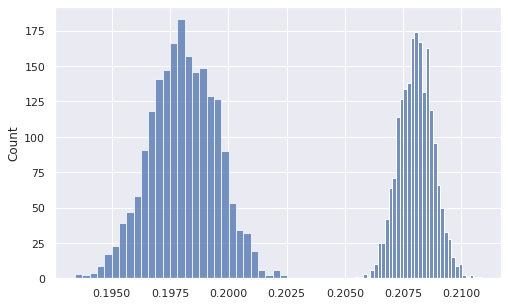

In [9]:

q = """
    SELECT exp_group,
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) >= '2022-12-02' AND toDate(time) <= '2022-12-08'
    
    AND  exp_group IN (1,2)
    GROUP BY exp_group, user_id
"""

def bootstrap(likes1, views1, likes2, views2, n_bootstrap=2000):
    poisson_bootstraps1 = stats.poisson(1).rvs(
    (n_bootstrap, len(likes1))).astype(np.int64)
    poisson_bootstraps2 = stats.poisson(1).rvs(
    (n_bootstrap, len(likes2))).astype(np.int64)
    globalCTR1 = (poisson_bootstraps1*likes1).sum(axis=1)/(poisson_bootstraps1*views1).sum(axis=1)
    globalCTR2 = (poisson_bootstraps2*likes2).sum(axis=1)/(poisson_bootstraps2*views2).sum(axis=1)
    return globalCTR1, globalCTR2



df = pandahouse.read_clickhouse(q, connection=connection)
likes1 = df[df.exp_group == 1].likes.to_numpy()
views1 = df[df.exp_group == 1].views.to_numpy()
likes2 = df[df.exp_group == 2].likes.to_numpy()
views2 = df[df.exp_group == 2].views.to_numpy()
ctr1, ctr2 = bootstrap(likes1, views1, likes2, views2)
sns.histplot(ctr1)
sns.histplot(ctr2)


# раз визуально примерно норм рапсределнеи, то класически ДИ посчитаем?

0.20804210467600398
0.19806244252678704


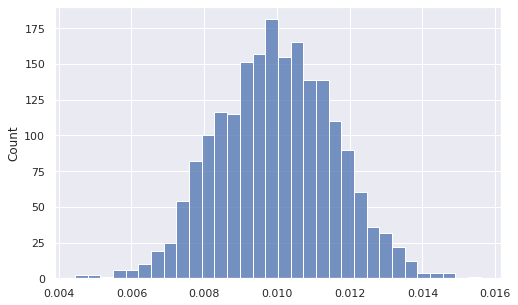

In [10]:
#Разница между глобальными CTR
sns.histplot(ctr1 - ctr2)
print(ctr1.mean())
print(ctr2.mean())

                                                        БАКЕТНОЕ ПРЕОБРАЗОВАНИЕ
    

(50,)

ShapiroResult(statistic=0.9675326347351074, pvalue=0.18335764110088348)

ShapiroResult(statistic=0.9939786791801453, pvalue=0.9964348673820496)

LeveneResult(statistic=16.927806299825324, pvalue=8.092371176110059e-05)

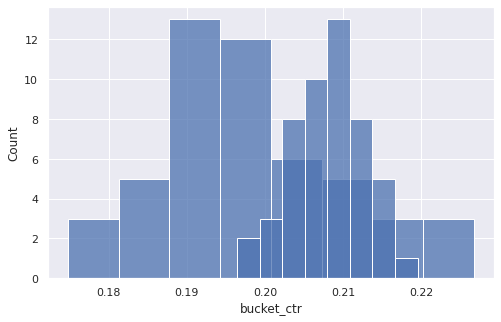

In [11]:
#  я не совсем понял, и поэтому вместо метрики "подовляющего" охвата значений(0,9 перцент)  CTR, исопльвал среднее

q = """
    SELECT exp_group, bucket,
    sum(likes)/sum(views) as bucket_ctr,
    avg(ctr) as mean_ctr_after_bucket
        FROM
    (SELECT exp_group,
    xxHash64(user_id)%50 as bucket,
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) >= '2022-12-02' AND toDate(time) <= '2022-12-08'
    and exp_group in (1,2)
    GROUP BY exp_group, bucket, user_id)
        GROUP BY exp_group, bucket
"""

df = pandahouse.read_clickhouse(q, connection=connection)


sns.histplot(df[df.exp_group == 2].bucket_ctr)
sns.histplot(df[df.exp_group == 1].bucket_ctr)
#    не очень то группа 2 похожа на, нормальное но приближена к нему.


df[df.exp_group == 2].bucket_ctr.shape
#    всего 50 значений в выборках

stats.shapiro(df[df.exp_group == 2].bucket_ctr)
stats.shapiro(df[df.exp_group == 1].bucket_ctr)



#         ИТОГО, после бакетирования
#         1)
# Однако Господа, с натяжкой, оба dist оказались нормальными, чего я не ожидал. Ладно тогда можно
# и т тест, но ведь остается требование на гомогенность, для коррекности?

stats.levene(df.query('exp_group ==2').bucket_ctr, df.query('exp_group ==1').bucket_ctr)
# Н0-я гиптеза дядюшки Левена гласит об отсуствии отличий, но  здесь видим значимость p value
#   - посему, немогу продолжать, спорные моменты ( пока не подскажут причин + у меня много работы)


#         2)
# Для оценивания процентиля CTR ( из того что знаю) использовал бы бустап - но уже использован ранее:).

# здесь я решил оценить срендее по группам:
#         А) t test не прошел гомогенность, можно ли просто при расчете ставить UNEQUAL VARIANCE,
#         или нужно цчитывать что  то еще, на тек момент не знаю

#         Б) Тогда Значит Манн - Уитни ( помня,что он менее мощен )и Н0 гипотеза оценвае ранги.




#     ДЛЯ СЕБЯ (Манна-Уитни)
# Условия применения:

#     Сравниваемые значения не составляют пару коррелирующих  значений
#     Распределение признаков в каждой выборке может не соответствовать нормальному распределению

# U-критерий Манна-Уитни – это непараметрический статистический
# критерий, использующийся для сравнения выраженности показателей в двух  несвязных выборках
# Измеренные признаки располагаются на этой шкале в порядке
# возрастания, а затем нумеруются целыми числами. Эти числа и называются
# рангами. Значение имеет не сама величина признака, а лишь порядковое место,
# который она занимает среди других величин. 
#     Мерой отличия является число Т-  сумма рангов для каждой из групп. Этот метод определяет, достаточно ли мала
# зона перекрещивающихся значений между двумя рядами (ранжированным
# рядом значений параметра в первой выборке и таким же во второй выборке).
# Чем меньше значение критерия, тем вероятнее, что различия между значениями
# параметра в выборках достоверны.

# https://kpfu.ru/portal/docs/F991441113/NPS_22.U_Mann_Uitni.Frolova.pdf
# https://dspace.tltsu.ru/bitstream/123456789/3403/1/AhmetzhanovaGV-1-69-16-Z.pdf#%5B%7B%22num%22%3A150%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22FitR%22%7D%2C-139%2C11%2C558%2C595%5D

In [12]:
#  считаю манн - уитни, помня, что это знаечения ПОСЛЕ бакета и учитывая специфику  метода внутри критерия Манн - Уитни

In [13]:
stats.mannwhitneyu(df[df.exp_group == 1].bucket_ctr,
df[df.exp_group == 2].bucket_ctr, alternative = 'two-sided')







MannwhitneyuResult(statistic=1995.0, pvalue=2.859963936492646e-07)

In [14]:






#  3) Опишите потенциальную ситуацию, когда такое изменение могло произойти. Тут нет идеального ответа, подумайте.
    
#  4) Напишите рекомендацию, будем ли мы раскатывать новый алгоритм на всех новых пользователей или все-таки не стоит.

# Ваше решение — это ссылка на merge request с проведенным анализом.


               =====================================================================================

                            ОТДЕЛЬНО: РИТОРИЧЕСКИй ВОПРОС - ПОЧЕМУ РАЗЛИЧАЮТСЯ mean ЗАНЧЕНИЯ МЕТРИК
                                                ПРИ ИСПОЛЬЗОВАНИИ 2Х указанных метод оценки CTR

In [15]:
                                                

# не сразу понятно, но считая вместо процентиля , 
#     А) средний ctr  группированых по бакету/юзерам, метод avg(сtr) 
#     Б) и суммарые(likes/views) в бакетных группах после хеширования

# получаю разные значения,хотя мне не каалось,что так должно быть !


#           РАЗДУМЬЯ: 
# - или кто то тут не учитывает NAn /нулевые знаечния в сложении
#                 и при подсчете значменателя получается меньшее число(подсчет срденего)

# - или какая то другая математика,не замеченная мной,как обычно, используется




#         для наглядности

# SELECT exp_group, bucket,         ****bucket_ctr
#     sum(likes)/sum(views) as bucket_ctr,
#     avg(ctr) as mean_ctr_after_bucket
        
        
#         FROM
#     (SELECT exp_group,
#             xxHash64(user_id)%50 as bucket,                 ***mean_ctr_after_bucket
#                                                 user_id,
#                                                 sum(action = 'like') as likes,
#                                                 sum(action = 'view') as views,
#                                                 likes/views as ctr
#     FROM {db}.feed_actions
#     WHERE toDate(time) >= '2022-12-02' AND toDate(time) <= '2022-12-08'
#     and exp_group in (1,2)
#                                                 GROUP BY exp_group, bucket, user_id)
#         GROUP BY exp_group, bucket    
    
    
    
    
#         ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ:

#         1)
# да даже users находятся теже вгруппах(для обоих ctr),как я понял, ибо  xxHash64(user_id)%50 as bucket 
#         считается в первом подзапросе через группировку  GROUP BY exp_group, bucket, user_id
            
#           2) 
# если проверить , сумму средних по группам и бакетам, то че они не сходятся - метод бакетирования влияет?
# но было сказано, что  метод созраняет и среднюю и диспресию  - Я НЕ РАЗОБРАЛСЯ И РУКАМИ НЕ ПРОВЕРЯЛ
#                                                                     , НЕ ПОНИМАНИЮ ПРИНЦИПА ЭТОГО УТВРЕЖДЕНИЯ

df.query('exp_group ==1').agg({'bucket_ctr': 'sum'})
df.query('exp_group ==1').agg({'mean_ctr_after_bucket': 'sum'})

df.query('exp_group ==2').agg({'bucket_ctr': 'sum'})
df.query('exp_group ==2').agg({'mean_ctr_after_bucket': 'sum'})



# -----------------------------------------------
"""  НУЖНА ПОМОЩЬ, НАСТАВНИКИ - объясните, где я заблужился или на что нужно посмотреть?
    Хэш как то по другому считает юзеров?"""


#  Про бакетное преобразование и обоснования его применения лучше читать блог специалистов из Netflix,
#     они главные популяризаторы метода:
#         https://netflixtechblog.com/data-compression-for-large-scale-streaming-experimentation-c20bfab8b9ce»

# ---------------------------------------------


bucket_ctr    10.406085
dtype: float64

mean_ctr_after_bucket    10.782755
dtype: float64

bucket_ctr    9.912972
dtype: float64

mean_ctr_after_bucket    10.72074
dtype: float64

'  НУЖНА ПОМОЩЬ, НАСТАВНИКИ - объясните, где я заблужился или на что нужно посмотреть?\n    Хэш как то по другому считает юзеров?'

In [16]:
#   думаем/читаем дальше....вот что пишут наши коллеги AvitO(из лекции ссылка)
# Чем больше бакетов, тем меньше информации теряется, и тем меньше ошибка в равенстве. В Авито мы берем B = 200.


# берем 200 вместо 50
q = """
    SELECT exp_group, bucket,
    sum(likes)/sum(views) as bucket_ctr,
    avg(ctr) as mean_ctr_after_bucket
        FROM
    (SELECT exp_group,
    xxHash64(user_id)%200 as bucket,
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) >= '2022-12-02' AND toDate(time) <= '2022-12-08'
    and exp_group in (1,2)
    GROUP BY exp_group, bucket, user_id)
        GROUP BY exp_group, bucket
"""

df = pandahouse.read_clickhouse(q, connection=connection)


df.query('exp_group ==1').agg({'bucket_ctr': 'mean'})
df.query('exp_group ==1').agg({'mean_ctr_after_bucket': 'mean'})

df.query('exp_group ==2').agg({'bucket_ctr': 'mean'})
df.query('exp_group ==2').agg({'mean_ctr_after_bucket': 'mean'})



#           ИТОГО
# 1)  не помогло между собой сровнять....(mean_ctr_after_bucket, bucket_ctr)

# 2) однако  !!!знаечния bucket _ctr почти совпадают с знаечниями Пуассоновсокго бустрапа!
#     вот:
#    значения Пуассон Бустрапа
#     0.20803304130529449   1гр
#     0.19803582592148755   2гр

#    Значения Бакетного, считаем по средней
#     0.20824                гр1
#     0.19844                гр2

bucket_ctr    0.20824
dtype: float64

mean_ctr_after_bucket    0.215821
dtype: float64

bucket_ctr    0.19844
dtype: float64

mean_ctr_after_bucket    0.214366
dtype: float64

In [17]:
#   думаем/читаем дальше....вот что пишут наши коллеги AvitO(из лекции ссылка)


#  6. Hist. Тест Шапиро-Уилка на нормальность «бакетного» распределения. !!!

# Если индикатор красный, то, возможно, в выборке есть выбросы или аномально длинный хвост.
# В таком случае принимать результат по этой метрике нужно осторожно, либо не принимать вовсе.
# Клик на индикатор открывает гистограммы метрики по группам. По гистограмме однозначно видны аномалии — 
# так проще делать выводы.


stats.shapiro(df.query('exp_group == 1').mean_ctr_after_bucket)
stats.shapiro(df.query('exp_group == 2').mean_ctr_after_bucket)



    
#кароч, что тут вижу, если контрольная группа, где то близко к Нормальному, то тестовая в отрыве
#  даже, после бакетного рапсредления, сулившего мне чудеса.

#       ИТОГО

#         1)
# вероятно из за не соблюдения НОрмальности, нельзя и среднюю посчитат с уклоном на ПЦТ...

# Я стремлюсь к пониманию принципов и исследованию, что каждый раз и демонстрирую, хотя дается все это
# гораздо одльше,чем просто шляпать т тесты.   Прошу понять и простить.

ShapiroResult(statistic=0.9893324971199036, pvalue=0.1425204873085022)

ShapiroResult(statistic=0.9850203990936279, pvalue=0.03214406222105026)

In [18]:
#         2)
#             КАК ВСЕГДА - САМОЕ ИНТЕРЕСНОЕ!

# проверяю еще раз тестом
stats.shapiro(df.query('exp_group == 1').bucket_ctr)
stats.shapiro(df.query('exp_group == 2').bucket_ctr)


# вижу что все ок.

ShapiroResult(statistic=0.9960141181945801, pvalue=0.8841536045074463)

ShapiroResult(statistic=0.9929280281066895, pvalue=0.4509495198726654)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


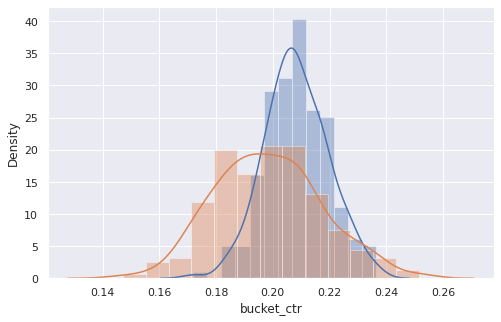

In [19]:


#                    ИТОГО

#     ВЫВОД 1
# как всегда, я решаю все задачи в несколько подходов и несоклько дней, ибо у меня регулярно пристуствует 
# невнимательность, по разным причинам.

#     ВЫВОД 2
# В предыдущем блок, я проверил не то рапсределение ))))  - не  ОТ Бакетного преобразования.
# Здесь рапсределение нормальное и можно принимать более опраданные решения на основании полученных результатов

#     ВЫВОД 3
# Исследоватьская жизнь, когда ты не внимателен - она такая,вечно сыпется на самом простом.

sns.distplot(df.query('exp_group == 1').bucket_ctr)
sns.distplot(df.query('exp_group == 2').bucket_ctr)


               =====================================================================================